In [1]:
import os
import shutil
import glob
from tqdm import tqdm
import random

data_dir = "~/VisualEmotion/data"
tr_split = 0.8
va_split = 0.9

## There are two datasets in six class: Emotion-6 and UnbiasedEmo
## (1) Anger(Disgust) -> Disgust 

In [2]:
## move UnbiasedEmo
random.seed(42)
for path in glob.glob("./data/UnBiasedEmo/images/*"):
    klass = path.split('/')[-1]
    imgs = glob.glob(path+'/*/*.jpg')
    random.shuffle(imgs)
    n = len(imgs)
    n_tr, n_va = int(n*tr_split), int(n*va_split)
    print(f"class: {klass}, all: {n}, train: {n_tr}, valid: {n_va-n_tr}, test: {n-n_va}")
    
    for i, img in enumerate(tqdm(imgs)):
        if i < n_tr:
            tgt = img.replace("UnBiasedEmo/images", "images/train")
        elif i < n_va:
            tgt = img.replace("UnBiasedEmo/images", "images/valid")
        else:
            tgt = img.replace("UnBiasedEmo/images", "images/test")
        #if klass == 'love':
        #   tgt = tgt.replace('love', 'neutral')
        if not os.path.exists('/'.join(tgt.split('/')[:-1])):
            os.makedirs('/'.join(tgt.split('/')[:-1]))
        
        # print(img, tgt)
        if os.path.exists(img):
            shutil.move(img, tgt)
        
if os.path.exists("./data/Emotion-6/images/anger/digust"): # typo in their dataset
    shutil.move("./data/Emotion-6/images/anger/digust", "./data/Emotion-6/images/disgust") 

## move Emotion-6
for path in glob.glob("./data/Emotion-6/images/*"):
    klass = path.split('/')[-1]
    imgs = glob.glob(path+'/**/*.jpg',recursive=True)
    random.shuffle(imgs)
    n = len(imgs)
    n_tr, n_va = int(n*tr_split), int(n*va_split)
    print(f"class: {klass}, all: {n}, train: {n_tr}, valid: {n_va-n_tr}, test: {n-n_va}")
    
    for i, img in enumerate(tqdm(imgs)):
        if i < n_tr:
            tgt = img.replace("Emotion-6/images", "images/train")
        elif i < n_va:
            tgt = img.replace("Emotion-6/images", "images/valid")
        else:
            tgt = img.replace("Emotion-6/images", "images/test")

        #if klass == 'love':
        #    tgt = tgt.replace('love', 'neutral')
        if not os.path.exists('/'.join(tgt.split('/')[:-1])):
            os.makedirs('/'.join(tgt.split('/')[:-1]))
        
        # print(img, tgt)
        if os.path.exists(img):
            shutil.move(img, tgt)

class: joy, all: 587, train: 469, valid: 59, test: 59


100%|██████████| 587/587 [00:00<00:00, 915.16it/s]


class: fear, all: 153, train: 122, valid: 15, test: 16


100%|██████████| 153/153 [00:00<00:00, 923.02it/s]


class: sadness, all: 758, train: 606, valid: 76, test: 76


100%|██████████| 758/758 [00:00<00:00, 959.30it/s]


class: surprise, all: 457, train: 365, valid: 46, test: 46


100%|██████████| 457/457 [00:00<00:00, 985.03it/s] 


class: anger, all: 440, train: 352, valid: 44, test: 44


100%|██████████| 440/440 [00:00<00:00, 936.44it/s]


class: love, all: 650, train: 520, valid: 65, test: 65


100%|██████████| 650/650 [00:00<00:00, 921.55it/s]


class: disgust, all: 171, train: 136, valid: 17, test: 18


100%|██████████| 171/171 [00:00<00:00, 920.13it/s]


class: joy, all: 1964, train: 1571, valid: 196, test: 197


100%|██████████| 1964/1964 [00:02<00:00, 923.33it/s]


class: fear, all: 1280, train: 1024, valid: 128, test: 128


100%|██████████| 1280/1280 [00:01<00:00, 931.66it/s]


class: sadness, all: 2221, train: 1776, valid: 222, test: 223


100%|██████████| 2221/2221 [00:02<00:00, 907.76it/s]


class: surprise, all: 557, train: 445, valid: 56, test: 56


100%|██████████| 557/557 [00:00<00:00, 945.22it/s]


class: anger, all: 1433, train: 1146, valid: 143, test: 144


100%|██████████| 1433/1433 [00:01<00:00, 905.87it/s]


class: love, all: 724, train: 579, valid: 72, test: 73


100%|██████████| 724/724 [00:00<00:00, 899.19it/s]


In [3]:
! rm ~/VisualEmotion/data/images/train/anger/rage/rage/287.jpg

<AxesSubplot:>

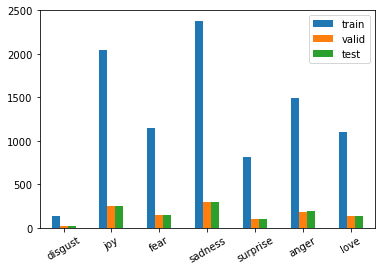

In [4]:
## counting imbalance class
import pandas as pd
res = {}
for name in ["train","valid","test"]:
    klass = {}
    for path in glob.glob(f"./data/images/{name}/*"):
        t = path.split('/')[-1]
        imgs = glob.glob(path + "/**/*.jpg", recursive=True)
        klass[t] = len(imgs)
    res[name] = klass
res = pd.DataFrame(res)
res.plot.bar(rot=30)

In [5]:
t = res/res.sum(axis=0)
t

,train,valid,test
disgust,0.014929,0.014925,0.015721
joy,0.223930,0.223881,0.223581
fear,0.125796,0.125549,0.125764
sadness,0.261471,0.261633,0.261135
surprise,0.088913,0.089552,0.089083
anger,0.164325,0.164179,0.164192
love,0.120637,0.120281,0.120524


In [17]:
print(t.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &     train &     valid &      test \\
\midrule
disgust  &  0.014930 &  0.014919 &  0.015324 \\
joy      &  0.223946 &  0.223782 &  0.223730 \\
fear     &  0.125732 &  0.125932 &  0.125657 \\
sadness  &  0.261417 &  0.261518 &  0.261384 \\
surprise &  0.088993 &  0.088635 &  0.089317 \\
anger    &  0.164374 &  0.164546 &  0.164186 \\
love     &  0.120609 &  0.120667 &  0.120403 \\
\bottomrule
\end{tabular}



## (2) Train a 6-classes ResNet50 based on Fear, Joy, Anger, Surprise, Disgust, Sadness

In [ ]:
!CUDA_VISIBLE_DEVICES=3 python main.py --use_self_imgF --lr 0.008 --model resnet50 --freeze_modules "~fc,avgpool,layer3,layer4" --freeze_first_n_epochs 200

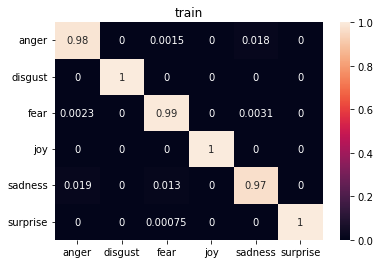

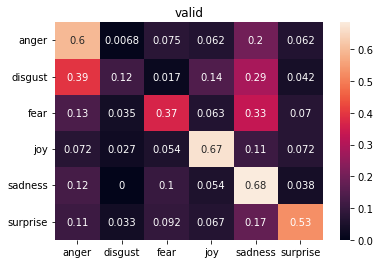

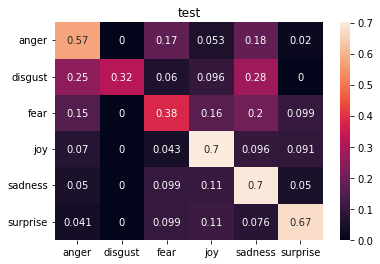

In [8]:
# Check the model's performance first

for name in ['train','valid','test']:
    pred = pd.read_pickle(f"./output/02-26_00-25-39/{name}_pred.pkl")
    
    pred.iloc[:,:-1] = np.exp(pred.iloc[:,:-1]).div(np.exp(pred.iloc[:,:-1]).sum(axis=1).values[:,None])
    pred_class = pred.iloc[:,:-1].values.argmax(axis=1)
    label = pred["label"]
    arr = pd.DataFrame(
        confusion_matrix(label,pred_class, normalize="true"), 
        index=["anger", "disgust", "fear", "joy", "sadness", "surprise"], 
        columns=["anger", "disgust", "fear", "joy", "sadness", "surprise"]
    )
    plt.figure()
    sns.heatmap(arr, annot=True)
    plt.title(name);plt.show()

## (3) Use the model to inference the `Love` samples
- If a sample was predicted as `Joy`, then label it `Joy`
- If not `Joy`, check its probability are flat, label it `Neutral`
- Else, discard the sample

How to model "flatness" of the probability?

I use $(prob-\frac{1}{6})^2$ as a measure of "flatness", and get the bottom 300 smallest "flatness" samples, label it `Neutral`

In [2]:
#!/apps/anaconda3/bin/python
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision
from typing import Any, Callable, cast, Dict, List, Optional, Tuple
import copy
import json
import argparse
from tqdm import tqdm
from PIL import Image, ImageFile
from datetime import datetime
from sklearn.metrics import confusion_matrix
from torch.utils.tensorboard import SummaryWriter
import seaborn as sns
import matplotlib.pyplot as plt
ImageFile.LOAD_TRUNCATED_IMAGES = True

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def load_state_dict_unsafe(model, state_dict):
    """
    Load state dict to provided model while ignore exceptions.
    """

    missing_keys = []
    unexpected_keys = []
    error_msgs = []

    # copy state_dict so _load_from_state_dict can modify it
    metadata = getattr(state_dict, '_metadata', None)
    state_dict = state_dict.copy()
    if metadata is not None:
        state_dict._metadata = metadata

    def load(module, prefix=''):
        local_metadata = {} if metadata is None else metadata.get(prefix[:-1], {})
        module._load_from_state_dict(
            state_dict, prefix, local_metadata, True, missing_keys, unexpected_keys, error_msgs)
        for name, child in module._modules.items():
            if child is not None:
                load(child, prefix + name + '.')

    load(model)
    load = None  # break load->load reference cycle

    return {
        'unexpected_keys': unexpected_keys,
        'missing_keys': missing_keys,
        'error_msgs': error_msgs
    }    

def inference(model, imgF):

    model.eval()

    preds = [] # Logits: [N * 6]
    for name in ["train","valid","test"]:
        loader = imgF(f"~/VisualEmotion/data/images/{name}/love",transform=transform_test)
        loader = torch.utils.data.DataLoader(loader, batch_size=256, drop_last=False, num_workers=0)
        indices = [it[0] for it in loader.dataset.imgs]
        
        t = []
        for feat, _ in tqdm(loader, desc=name, total=len(loader)):
            
            feat = feat.to(device)

            with torch.no_grad():
                pred = model(feat).softmax(dim=1)

            t.append(pd.DataFrame(
                pred.cpu().numpy(), 
                columns=["anger", "disgust", "fear", "joy", "sadness", "surprise"]))
        
        t = pd.concat(t, axis=0)
        t.index = indices
        preds.append(t)
    preds = pd.concat(preds, axis=0)

    return preds



In [3]:
# dataloader
transform_test = torchvision.transforms.Compose([
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])])
imgF = torchvision.datasets.ImageFolder

# model
model_name = "resnet50"
init_state = "./output/02-26_10-45-30/model.bin"
model = eval("torchvision.models." + model_name)(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 6)
res = load_state_dict_unsafe(model, torch.load(init_state, map_location='cpu'))
model.to(device)
print(res)


{'unexpected_keys': [], 'missing_keys': [], 'error_msgs': []}


In [4]:
# inference 
pred_love = inference(model, imgF)

train:  40%|████      | 2/5 [00:09<00:14,  4.79s/it]/apps/anaconda3/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
test: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]


<AxesSubplot:>

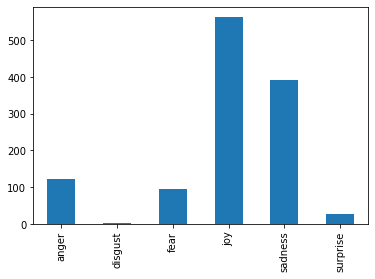

In [5]:
pred_love.round().sum(axis=0).plot.bar()

In [6]:
# get images relabeled as `joy`
relabel_joy = pred_love[pred_love.idxmax(axis=1)=='joy']
relabel_joy

,anger,disgust,fear,joy,sadness,surprise
/user/hl3541/VisualEmotion/data/images/train/love/affection/adoration/15215314513-Adoration.jpg,0.000540,6.558300e-04,0.006288,0.819167,0.001856,0.171492
/user/hl3541/VisualEmotion/data/images/train/love/affection/adoration/251.jpg,0.000448,2.012514e-04,0.002645,0.994613,0.000457,0.001635
/user/hl3541/VisualEmotion/data/images/train/love/affection/adoration/2800776803-Adoration.jpg,0.225013,1.525864e-03,0.027542,0.519405,0.216255,0.010259
/user/hl3541/VisualEmotion/data/images/train/love/affection/adoration/3123573901-Adoration.jpg,0.000002,3.014796e-07,0.000006,0.999982,0.000004,0.000005
/user/hl3541/VisualEmotion/data/images/train/love/affection/adoration/317.jpg,0.001284,2.251512e-04,0.071826,0.926122,0.000306,0.000237
...,...,...,...,...,...,...
/user/hl3541/VisualEmotion/data/images/test/love/scenery/23 2.jpg,0.012794,1.198093e-03,0.005735,0.867258,0.103468,0.009548
/user/hl3541/VisualEmotion/data/images/test/love/scenery/3 3.jpg,0.000146,3.446950e-05,0.000650,0.998209,0.000445,0.000515
/user/hl3541/VisualEmotion/data/images/test/love/scenery/5.jpg,0.001594,1.396132e-04,0.000493,0.989374,0.002527,0.005873
/user/hl3541/VisualEmotion/data/images/test/love/scenery/98.jpg,0.196507,3.882424e-03,0.020819,0.330067,0.152710,0.296015


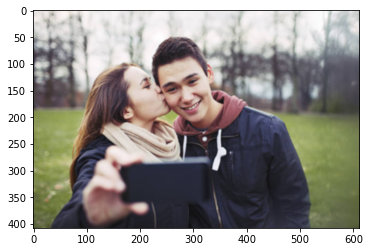

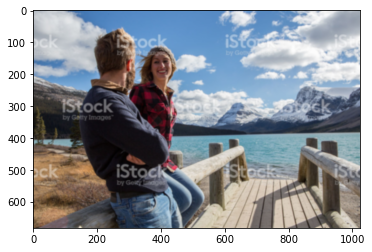

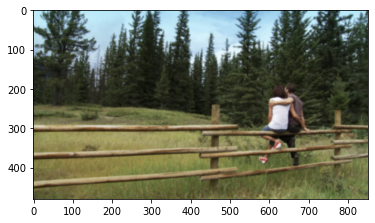

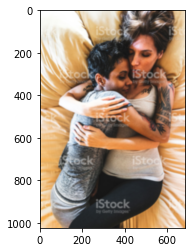

In [7]:
for i in [1,3,5,7]:
    with Image.open(relabel_joy.index[-i]) as im:
        plt.figure()
        plt.imshow(torchvision.transforms.ToPILImage()(torchvision.transforms.ToTensor()(im)), interpolation="bicubic")

In [8]:
# fliter images relabeled as `joy`
pred_love = pred_love[~pred_love.index.isin(relabel_joy.index)]
pred_love

,anger,disgust,fear,joy,sadness,surprise
/user/hl3541/VisualEmotion/data/images/train/love/affection/adoration/105.jpg,0.409750,0.002344,0.575558,0.000901,0.010924,0.000522
/user/hl3541/VisualEmotion/data/images/train/love/affection/adoration/1088201311-Adoration.jpg,0.241085,0.010276,0.151666,0.191854,0.288521,0.116597
/user/hl3541/VisualEmotion/data/images/train/love/affection/adoration/1094571826-Adoration.jpg,0.298412,0.139503,0.310152,0.032643,0.212587,0.006704
/user/hl3541/VisualEmotion/data/images/train/love/affection/adoration/13232716-Adoration.jpg,0.385208,0.015096,0.018345,0.201758,0.307242,0.072351
/user/hl3541/VisualEmotion/data/images/train/love/affection/adoration/13482026695-Adoration.jpg,0.356114,0.018382,0.525861,0.031467,0.063117,0.005059
...,...,...,...,...,...,...
/user/hl3541/VisualEmotion/data/images/test/love/scenery/1.jpg,0.140623,0.000921,0.027291,0.120257,0.633763,0.077146
/user/hl3541/VisualEmotion/data/images/test/love/scenery/180.jpg,0.162198,0.001354,0.014371,0.064349,0.754677,0.003052
/user/hl3541/VisualEmotion/data/images/test/love/scenery/2 2.jpg,0.814820,0.005350,0.154454,0.008733,0.015350,0.001293
/user/hl3541/VisualEmotion/data/images/test/love/scenery/4 2.jpg,0.017151,0.004052,0.055975,0.447500,0.462690,0.012632


In [9]:
# get most 300 `flat` probability images and relabel as `neutral`, sample and check the files
relabel_neutral = ((pred_love-1/6)**2).sum(axis=1).sort_values()
topn = 300 #len(flat_pred)//3
relabel_neutral = relabel_neutral.head(topn)
relabel_neutral

/user/hl3541/VisualEmotion/data/images/train/love/affection/adoration/1088201311-Adoration.jpg    0.048211
/user/hl3541/VisualEmotion/data/images/train/love/lust/lust/3927385703-Lust.jpg                   0.050657
/user/hl3541/VisualEmotion/data/images/valid/love/affection/affection/111147330-Affection.jpg     0.050745
/user/hl3541/VisualEmotion/data/images/train/love/people/15.jpg                                   0.066903
/user/hl3541/VisualEmotion/data/images/train/love/lust/passion/6818079183-Passion.jpg             0.070791
                                                                                                    ...   
/user/hl3541/VisualEmotion/data/images/train/love/gratitude/obligation/122.jpg                    0.344529
/user/hl3541/VisualEmotion/data/images/train/love/animals/68.jpg                                  0.345022
/user/hl3541/VisualEmotion/data/images/train/love/couple/101.jpg                                  0.345398
/user/hl3541/VisualEmotion/data/image

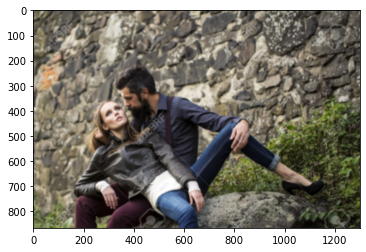

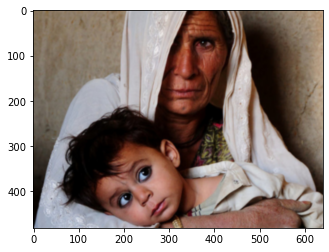

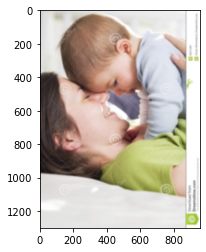

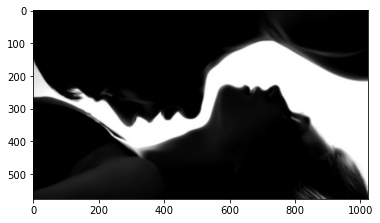

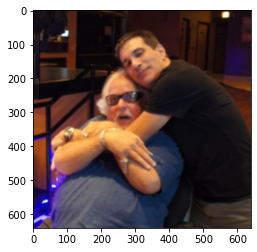

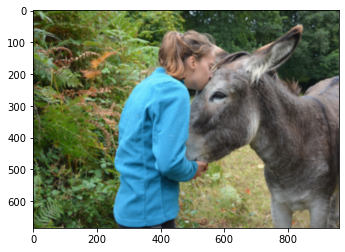

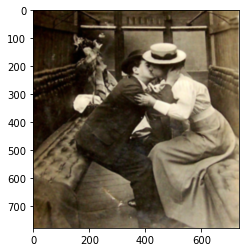

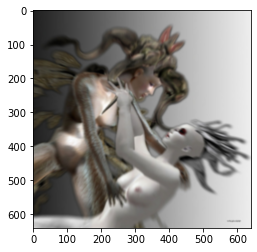

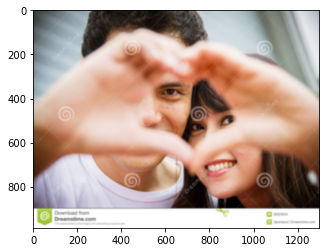

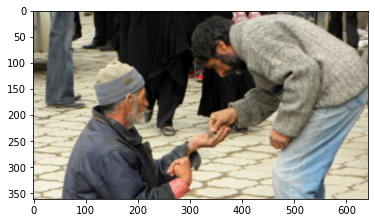

In [17]:
for i in range(1,100,10):
    with Image.open(relabel_neutral.index[-i]) as im:
        plt.figure()
        plt.imshow(torchvision.transforms.ToPILImage()(torchvision.transforms.ToTensor()(im)), interpolation="bicubic")

## (4) Relabeling

In [14]:
random.seed(42)
relabel_neutral = relabel_neutral.index.tolist()
relabel_joy = relabel_joy.index.tolist()
random.shuffle(relabel_neutral)
random.shuffle(relabel_joy)

# move to neutral
for name in ['train','valid','test']:
    if not os.path.exists(f"./data/images/{name}/neutral"):
        os.makedirs(f"./data/images/{name}/neutral")

n = len(relabel_neutral)
n_tr, n_va = int(n*tr_split), int(n*va_split)
for i, img in enumerate(tqdm(relabel_neutral)):
    src = img
    img = img.replace('train','-').replace('valid','-').replace('test','-')
    if i < n_tr:
        tgt = img.replace("-/love", "train/neutral/love")
    elif i < n_va:
        tgt = img.replace("-/love", "valid/neutral/love")
    else:
        tgt = img.replace("-/love", "test/neutral/love")
    if not os.path.exists('/'.join(tgt.split('/')[:-1])):
        os.makedirs('/'.join(tgt.split('/')[:-1]))

    # print(src, tgt)
    if os.path.exists(src):
        shutil.move(src, tgt)

        
# move to joy   
n = len(relabel_joy)
n_tr, n_va = int(n*tr_split), int(n*va_split)
for i, img in enumerate(tqdm(relabel_joy)):
    src = img
    img = img.replace('train','-').replace('valid','-').replace('test','-')
    if i < n_tr:
        tgt = img.replace("-/love", "train/joy/love")
    elif i < n_va:
        tgt = img.replace("-/love", "valid/joy/love")
    else:
        tgt = img.replace("-/love", "test/joy/love")
    if not os.path.exists('/'.join(tgt.split('/')[:-1])):
        os.makedirs('/'.join(tgt.split('/')[:-1]))

    # print(src, tgt)
    if os.path.exists(src):
        shutil.move(src, tgt)

100%|██████████| 617/617 [00:00<00:00, 768.46it/s]
